In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

In [2]:
file_path = 'https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Temperature%20Forecast/temperature.csv'
data = pd.read_csv(file_path)

In [3]:
print(data.head())

   station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat    

Text(0, 0.5, 'Frequency')

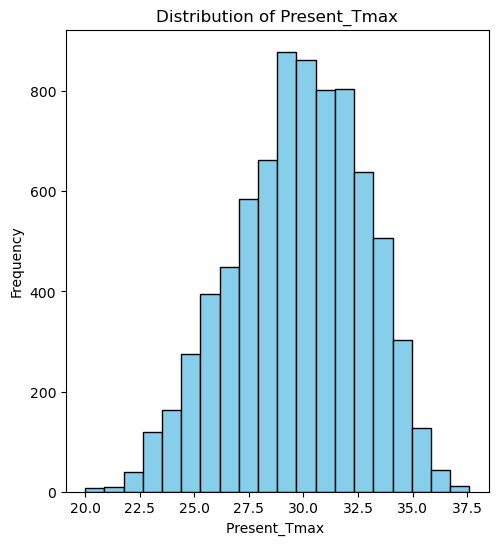

In [4]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(data['Present_Tmax'], bins=20, color='skyblue',edgecolor='black')
plt.title('Distribution of Present_Tmax')
plt.xlabel('Present_Tmax ')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

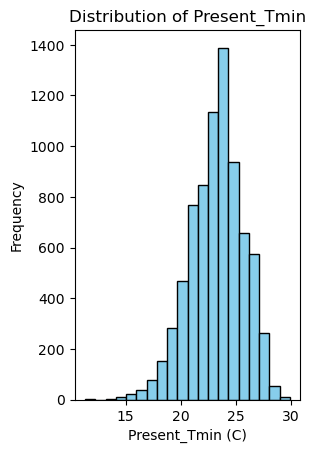

In [5]:
plt.subplot(1, 2, 2)
plt.hist(data['Present_Tmin'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Present_Tmin')
plt.xlabel('Present_Tmin (C)')
plt.ylabel('Frequency')

In [6]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [7]:
data = data.dropna()

In [8]:
X = data.drop(columns=['Date','Next_Tmax','Next_Tmin'])
y_max = data['Next_Tmax']
y_min = data['Next_Tmin']

In [9]:
X_train, X_test, y_max_train, y_max_test = train_test_split(X, y_max, test_size=0.2, random_state=42)
_, _, y_min_train, y_min_test = train_test_split(X, y_min, test_size=0.2, random_state=42)

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
poly  = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [12]:
model_max = LinearRegression()
model_max.fit(X_train_scaled, y_max_train)
y_max_pred = model_max.predict(X_test_scaled)

In [13]:
mse_max = mean_squared_error(y_max_test, y_max_pred)
r2_max = r2_score(y_max_test, y_max_pred)
mape_max = mean_absolute_percentage_error(y_max_test, y_max_pred)

In [14]:
print("Next_Tmax Prediction with Polynomial Regression")
print("Mean Squared Error:", mse_max)
print("R^2 Score:", r2_max)
print("Mean Absolute Percentage Error (MAPE):", mape_max * 100, "%")

Next_Tmax Prediction with Polynomial Regression
Mean Squared Error: 2.1549009668756236
R^2 Score: 0.7711803852175406
Mean Absolute Percentage Error (MAPE): 3.7447832905738028 %


In [15]:
model_min = LinearRegression()
model_min.fit(X_train_scaled, y_min_train)
y_min_pred = model_min.predict(X_test_scaled)

In [16]:
print("Next_Tmin Prediction")
print("Mean Squared Error:", mean_squared_error(y_min_test, y_min_pred))
print("R^2 Score:", r2_score(y_min_test, y_min_pred))

Next_Tmin Prediction
Mean Squared Error: 1.0261056901751329
R^2 Score: 0.8329684041693743


In [17]:
accuracy_max = r2_score(y_max_test, y_max_pred)
accuracy_min = r2_score(y_min_test, y_min_pred)

In [18]:
print("Accuracy Score for Next_Tmax Prediction:", accuracy_max)
print("Accuracy Score for Next_Tmin Prediction:", accuracy_min)

Accuracy Score for Next_Tmax Prediction: 0.7711803852175406
Accuracy Score for Next_Tmin Prediction: 0.8329684041693743


In [19]:
mse_min = mean_squared_error(y_min_test, y_min_pred)
r2_min = r2_score(y_min_test, y_min_pred)
mape_min = mean_absolute_percentage_error(y_min_test, y_min_pred)
accuracy_min = r2_min

In [20]:
print("Next_Tmin Prediction with Polynomial Regression")
print("Mean Squared Error:", mse_min)
print("R^2 Score:", r2_min)
print("Mean Absolute Percentage Error (MAPE):", mape_min * 100, "%")
print("Accuracy (R^2 Score):", accuracy_min)

Next_Tmin Prediction with Polynomial Regression
Mean Squared Error: 1.0261056901751329
R^2 Score: 0.8329684041693743
Mean Absolute Percentage Error (MAPE): 3.510459800335079 %
Accuracy (R^2 Score): 0.8329684041693743
